### Imports 

In [1]:
from budget import gen_budget_data,plot_changing_budget
from monthly import gen_monthly_data,plot_changing_month,plot_network_size
import configparser
from train import print_config,train_agent
from lightning_gym.utils import random_seed
import warnings
warnings.filterwarnings("ignore")


C:\lightning-gym\venv\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\lightning-gym\venv\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\lightning-gym\venv\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
Using backend: pytorch


### Train Agent

training
	episodes = 100
	verbose = True
env
	budget = 10
	node_id = 
	repeat = False
	cutoff = 20
	graph_type = scale_free
	n = 128
	seed = 5785
agent
	load_model = False
	model_file = mbi_net.pt
	cuda = False
	in_features = 1
	hid_features = 128
	out_features = 128
	gamma = 0.99
	learning_rate = 1e-2
	layers = 2
E: 0, S: 128, R: 0.3449, N:[0, 2, 3, 6, 8, 19, 23, 24, 25, 46]
E: 1, S: 128, R: 0.1774, N:[0, 1, 2, 5, 6, 10, 24, 34, 45, 119]
E: 2, S: 128, R: 0.4148, N:[0, 1, 6, 11, 14, 18, 21, 22, 37, 69]
E: 3, S: 128, R: 0.3658, N:[0, 1, 2, 3, 7, 11, 12, 42, 56, 72]
E: 4, S: 128, R: 0.4982, N:[0, 1, 2, 5, 7, 41, 49, 56, 61, 72]
E: 5, S: 128, R: 0.2726, N:[0, 1, 12, 19, 21, 22, 25, 38, 91, 108]
E: 6, S: 128, R: 0.1452, N:[0, 2, 13, 18, 24, 27, 29, 36, 49, 70]
E: 7, S: 128, R: 0.2365, N:[1, 2, 5, 8, 11, 23, 25, 29, 51, 61]
E: 8, S: 128, R: 0.3002, N:[1, 2, 4, 13, 15, 16, 29, 31, 39, 56]
E: 9, S: 128, R: 0.2568, N:[0, 2, 6, 9, 15, 34, 37, 49, 50, 58]
E: 10, S: 128, R: 0.2206, N:[1, 2, 5, 6,

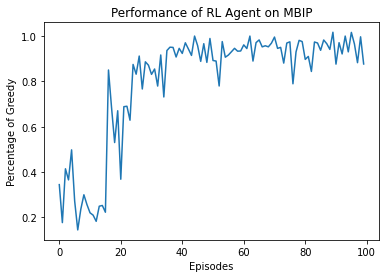

In [7]:
config = configparser.ConfigParser()
config_loc = "./configs/train_scale_free.conf"
config.read(config_loc)
# config["training"]["verbose"] = "True"
print_config(config)
seed = config["env"].getint("seed", fallback=None)
if seed:
    random_seed(seed)
# train_upwards(config)
log = train_agent(config, pog=True) # pog -> percentage of greedy
# before_after()
log.plot_reward(reward_type="pog")


### Generate monthly comparison

In [3]:
config = configparser.ConfigParser()
config_loc = "./configs/test_snapshot.conf"
config.read(config_loc)
print_config(config)
seed = config["env"].getint("seed", fallback=None)
if seed:
    random_seed(seed)
# gen_monthly_data(config)

training
	episodes = 0
	verbose = False
env
	budget = 10
	node_id = 
	repeat = True
	cutoff = 20
	graph_type = snapshot
	down_sample = False
	filename = 2-26-22.json
	seed = 5785
agent
	load_model = True
	model_file = mbi_net.pt
	cuda = False
	in_features = 1
	hid_features = 128
	out_features = 128
	gamma = 0.99
	layers = 2
edge_filters
	minimum_capacity = 0
	maximum_capacity = 1_000_000_000_000
graph_filters
	remove_bridges = True
	combine_multiedges = True


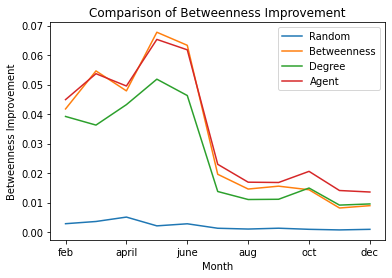

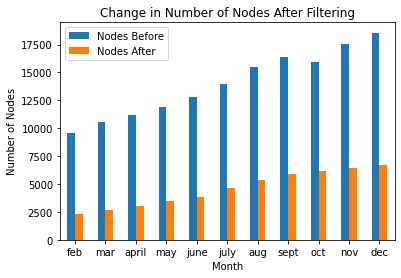

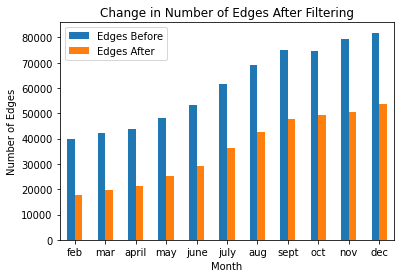

In [4]:
plot_changing_month()
plot_network_size()

#### Generate results by budget

In [5]:
config = configparser.ConfigParser()
config_loc = "configs/test_scale_free.conf"
config.read(config_loc)
config["env"]["repeat"] = "True"
# config["training"]["verbose"] = "True"
seed = config["env"].getint("seed", fallback=None)
print_config(config)
if seed:
    random_seed(seed)
    print("seed set")
# gen_budget_data(config)

training
	episodes = 0
	verbose = False
env
	budget = 10
	node_id = 
	repeat = True
	cutoff = 20
	n = 128
	graph_type = scale_free
	seed = 5785
agent
	load_model = True
	model_file = mbi_net.pt
	cuda = False
	in_features = 1
	hid_features = 128
	out_features = 128
	gamma = 0.99
	layers = 2
edge_filters
	minimum_capacity = 0
	maximum_capacity = 1_000_000_000_000
graph_filters
	remove_bridges = True
	combine_multiedges = True
seed set


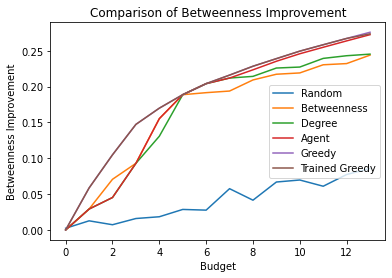

In [6]:
plot_changing_budget()